In [1]:
import pandas as pd

path="/content/breast_cancer_survival - breast_cancer_survival_.csv.csv"
#reading the path and loading the dataset in dataframe
df=pd.read_csv(path)

# print the rows and column in given dataset
print(df.shape)

# printing first 5 rows of the dataset
print(df.head())

(334, 15)
   Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0   42  FEMALE   0.95256   2.15000  0.007972 -0.048340           II   
1   54  FEMALE   0.00000   1.38020 -0.498030 -0.507320           II   
2   63  FEMALE  -0.52303   1.76400 -0.370190  0.010815           II   
3   78  FEMALE  -0.87618   0.12943 -0.370380  0.132190            I   
4   42  FEMALE   0.22611   1.74910 -0.543970 -0.390210           II   

                       Histology ER status PR status HER2 status Surgery_type  \
0  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
1  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
2  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   Lumpectomy   
3  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
4  Infiltrating Ductal Carcinoma  Positive  Positive    Positive   Lumpectomy   

  Date_of_Surgery Date_of_Last_Visit Patient_Status  
0       20-May-18     

In [2]:
#tells the concise summary of dataframe including index range,column details,datatypes,memory usage
print(df.info())

#checking for null values
print(df.isnull().sum())     #The .isnull() function tells whether mising values are there or not and the .sum() counts the number of mising values in each column

print(df.describe())        # Provides statisticall summary of numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.3+ K

In [3]:
 #If the missing values are critical (like Patient_Status), we might want to drop those rows as if we enter anything wrong than it can directly affect the results.
 df=df.dropna(subset=['Patient_Status'])

  #df.dropna(): This method removes rows with missing values.

  #subset=['Patient_Status']: Specifies that only rows with missing values in the Patient_Status column should be removed.




 #filling the date of last visit by most frequent date
 df['Date_of_Last_Visit'].fillna(df['Date_of_Last_Visit'].mode()[0],inplace=True)

 #.fillna(): This method fills missing values with a specified value.

 #df['Date_of_Last_Visit'].mode()[0]  : It calucates the mode of that column and prints the first mode value incase multiple modes

 #inplace=True: This parameter modifies the DataFrame in place, meaning it changes the existing DataFrame without creating a new one.

<ipython-input-3-ef4ec807dfc6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_of_Last_Visit'].fillna(df['Date_of_Last_Visit'].mode()[0],inplace=True)


In [4]:
#printing the uncleaned dataset
print(df)

#counting the duplicates
dupli=df.duplicated().sum()

#.duplicated() Tells whether row is unique or not in bool fromat

#.sum()   gives the total number of duplicate rows.
print(f'Duplicate: {dupli}')

#removing the duplicate rows keeping first occurence row by default
df=df.drop_duplicates()

     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340           II   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320           II   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815           II   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            I   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210           II   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320           II   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            I   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860           II   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820           II   
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050           II   

                          Histology ER status PR status HER2 status  \
0     Infiltrating Ductal Carcinoma  Positive  Posit

In [5]:
# converting date column to datetime
df['Date_of_Surgery'] = pd.to_datetime(df['Date_of_Surgery'])

#.to_datetime(df['Date_of_Surgery']) :  Converts the column into datetime object i.e automatically into corret format


df['Date_of_Last_Visit'] = pd.to_datetime(df['Date_of_Last_Visit'])


<ipython-input-5-c484e4592db1>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date_of_Surgery'] = pd.to_datetime(df['Date_of_Surgery'])
<ipython-input-5-c484e4592db1>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date_of_Last_Visit'] = pd.to_datetime(df['Date_of_Last_Visit'])


In [6]:
from sklearn.preprocessing import MinMaxScaler     #Imports the MinMaxScaler class from sklearn.preprocessing i.e scikit library. This class is used to scale features to a specified range, typically [0, 1].

#normalizing the  protein levels
scaler=MinMaxScaler()    # Creates an instance of the MinMaxScaler class.
df[['Protein1','Protein2','Protein3','Protein4']]=scaler.fit_transform(df[['Protein1','Protein2','Protein3','Protein4']])

# fit_transform method first calculates the minimum and maximum values for each feature (column) and then scales the data to the range [0, 1].
# scaled value = value - min / max-min
print(df.head())

   Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0   42  FEMALE  0.828516  0.714170  0.428018  0.540887           II   
1   54  FEMALE  0.573699  0.538454  0.295585  0.415325           II   
2   63  FEMALE  0.433784  0.626061  0.329044  0.557070           II   
3   78  FEMALE  0.339313  0.252951  0.328994  0.590275            I   
4   42  FEMALE  0.634185  0.622660  0.283561  0.447363           II   

                       Histology ER status PR status HER2 status Surgery_type  \
0  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
1  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
2  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   Lumpectomy   
3  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
4  Infiltrating Ductal Carcinoma  Positive  Positive    Positive   Lumpectomy   

  Date_of_Surgery Date_of_Last_Visit Patient_Status  
0      2018-05-20         2018-0

In [7]:
#The cleaned dataset looks like
# Saving the DataFrame with all transformations to a new CSV file
#Converting the dataframe to csv file
df.to_csv('preprocessed_dataset.csv', index=False)

# index=False means that the row indices (the numbers or labels that identify each row) will not be written to the CSV file for maintaining it clean.


#Load the transformed CSV dataset file
import pandas as pd
df = pd.read_csv('preprocessed_dataset.csv')
print("Thus,the data is preprocessed and cleaned successfully..\n")
print(df.head())


Thus,the data is preprocessed and cleaned successfully..

   Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0   42  FEMALE  0.828516  0.714170  0.428018  0.540887           II   
1   54  FEMALE  0.573699  0.538454  0.295585  0.415325           II   
2   63  FEMALE  0.433784  0.626061  0.329044  0.557070           II   
3   78  FEMALE  0.339313  0.252951  0.328994  0.590275            I   
4   42  FEMALE  0.634185  0.622660  0.283561  0.447363           II   

                       Histology ER status PR status HER2 status Surgery_type  \
0  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
1  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
2  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   Lumpectomy   
3  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
4  Infiltrating Ductal Carcinoma  Positive  Positive    Positive   Lumpectomy   

  Date_of_Surgery Date_of_La

In [8]:
import pandas as pd

# Loading the dataset
file_path = '/content/preprocessed_dataset.csv'
df = pd.read_csv(file_path)

# Display the first 5 rows and summary information
print(df.head())
print(df.info())
print(df.describe())


   Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0   42  FEMALE  0.828516  0.714170  0.428018  0.540887           II   
1   54  FEMALE  0.573699  0.538454  0.295585  0.415325           II   
2   63  FEMALE  0.433784  0.626061  0.329044  0.557070           II   
3   78  FEMALE  0.339313  0.252951  0.328994  0.590275            I   
4   42  FEMALE  0.634185  0.622660  0.283561  0.447363           II   

                       Histology ER status PR status HER2 status Surgery_type  \
0  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
1  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
2  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   Lumpectomy   
3  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
4  Infiltrating Ductal Carcinoma  Positive  Positive    Positive   Lumpectomy   

  Date_of_Surgery Date_of_Last_Visit Patient_Status  
0      2018-05-20         2018-0

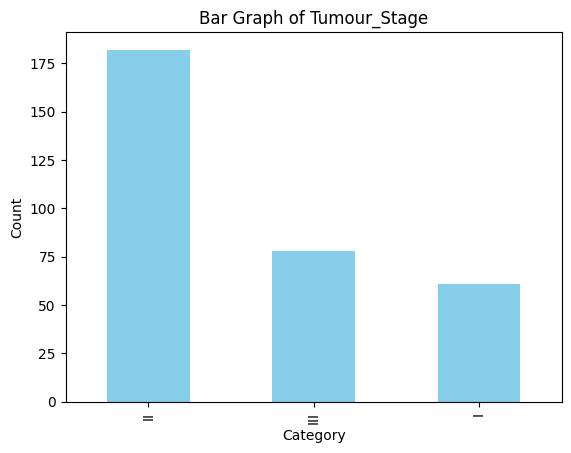

In [9]:
import matplotlib.pyplot as plt

# making a bar graph of tumour age

df['Tumour_Stage'].value_counts().plot(kind='bar', color='skyblue')

#.value_counts(): method of pandas that counts the occurence of unqine value in given column
#.plot(kind='bar', color='skyblue')  plot is method in pandas that has parameter kind which tells the type of plot and parameter colour to decide colour

plt.title('Bar Graph of Tumour_Stage')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


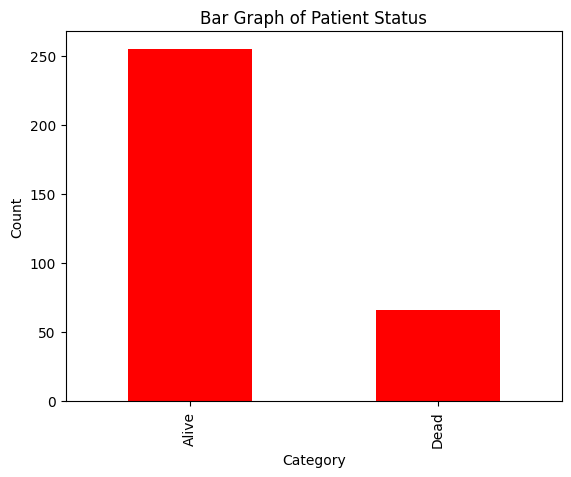

In [10]:
import matplotlib.pyplot as plt

#same goes for drawing bar graph for Patient status
df['Patient_Status'].value_counts().plot(kind='bar', color='red')
plt.title('Bar Graph of Patient Status')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


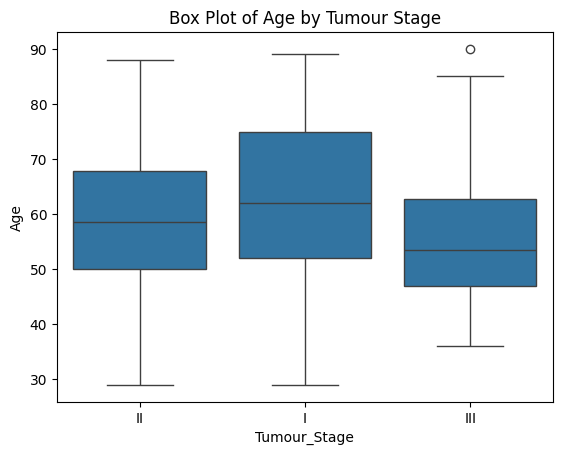

In [11]:
import seaborn as sns

# Box plot of Age grouped by Tumour Stage
sns.boxplot(x='Tumour_Stage', y='Age', data=df)   #.boxplot() :a Seaborn function that creates a boxplot
                                                  # On x axis boxplot will create separate boxes for each category in Tumour_Stage.
                                                  # On Y axis for each tumor stage, the boxplot will show the distribution of patient ages.
plt.title('Box Plot of Age by Tumour Stage')
plt.show()


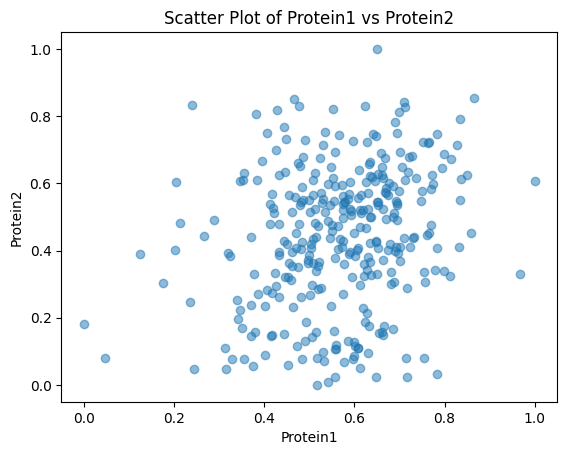

In [12]:
import matplotlib.pyplot as plt

# Scatter plot of Protein1 vs Protein2
plt.scatter(df['Protein1'], df['Protein2'], alpha=0.5)
# apha tells the transparency level ranging from 0(transparent) -1(opaque)
plt.title('Scatter Plot of Protein1 vs Protein2')
plt.xlabel('Protein1')
plt.ylabel('Protein2')
plt.show()


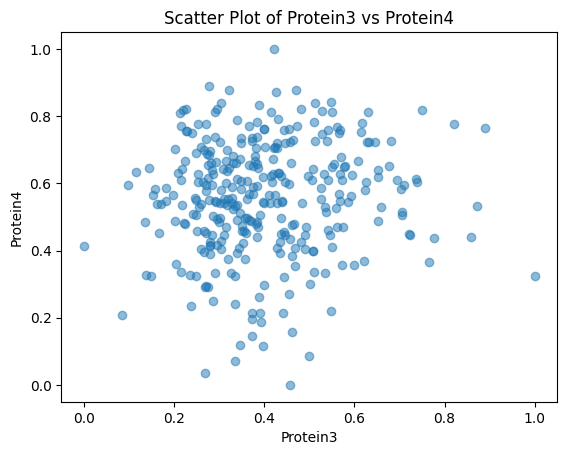

In [13]:
import matplotlib.pyplot as plt

# Scatter plot of Protein1 vs Protein2
plt.scatter(df['Protein3'], df['Protein4'], alpha=0.5)
plt.title('Scatter Plot of Protein3 vs Protein4')
plt.xlabel('Protein3')
plt.ylabel('Protein4')
plt.show()

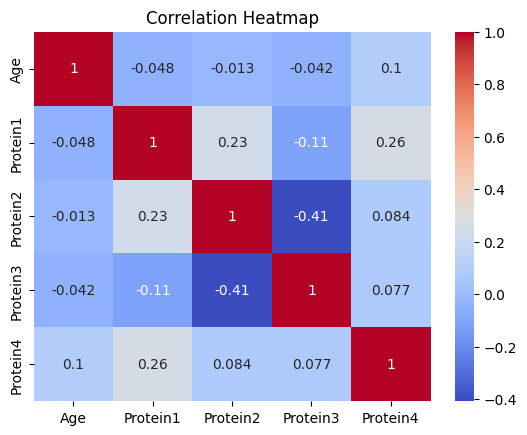

In [14]:
import seaborn as sns

# Selecting only numerical columns for the correlation matrix
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()      #.corr() gives the correlation between the numerical columns

# Plotting the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')   #annot=True :This argument adds the actual correlation coefficient values on the heatmap. Each cell in the heatmap will display the corresponding value from the correlation matrix.
plt.title('Correlation Heatmap')
plt.show()


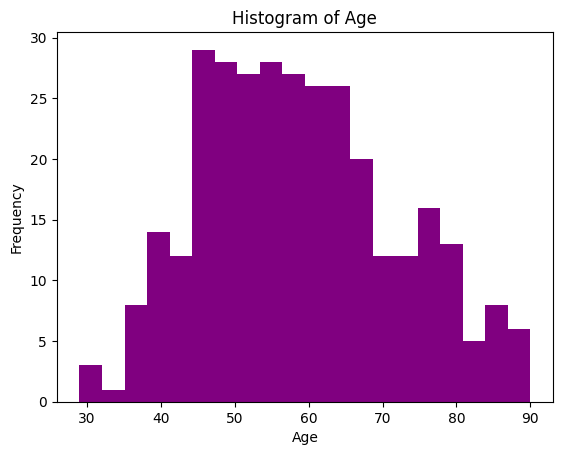

In [15]:
# Histogram of the Age column
df['Age'].plot(kind='hist', bins=20, color='purple')  #bins divide the data into 20 intervals
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


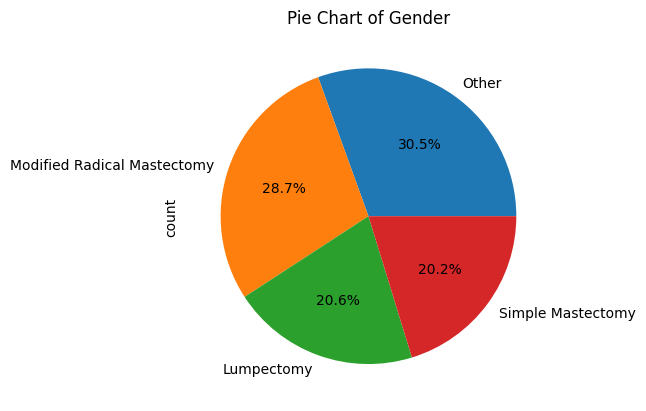

In [16]:
# Pie chart of the Gender column
df['Surgery_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')  #autopct=This argument controls how the percentage of each slice is displayed on the pie chart.

# '%1.1f%%  means that the percentages will be shown with one decimal place.

plt.title('Pie Chart of Gender')
plt.show()


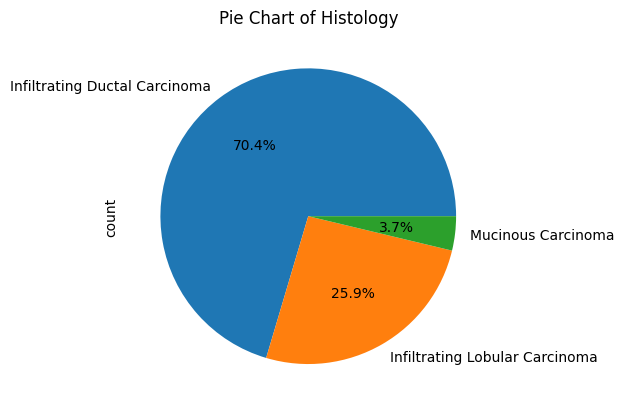

In [17]:
# Pie chart of the Gender column
df['Histology'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Histology')
plt.show()


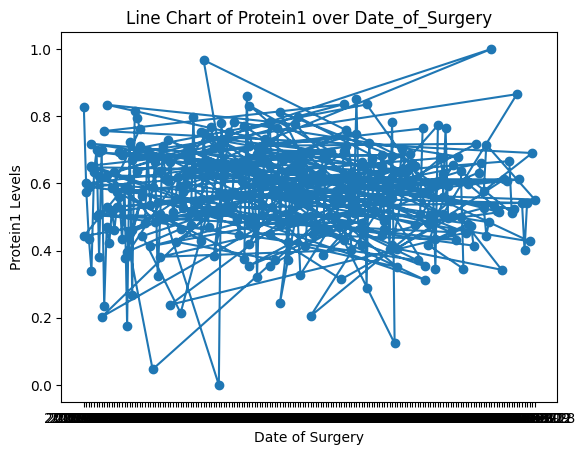

In [18]:
# Line chart of Protein1 over Date_of_Surgery
plt.plot(df['Date_of_Surgery'], df['Protein1'], marker='o')   #marker='o': Specifies circular markers for the data points.
plt.title('Line Chart of Protein1 over Date_of_Surgery')
plt.xlabel('Date of Surgery')
plt.ylabel('Protein1 Levels')
plt.show()

